<a href="https://colab.research.google.com/github/GIRISH2409/PM-using-logistic/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train = pd.read_csv('/content/train.csv', index_col = 0 )
train.head(15)

,Date,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Failure,?Date.year,?Date.month,?Date.day-of-month,?Date.day-of-week,?Date.hour,?Date.minute,?Date.second
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,01-01-2016 00:00,67,82,Operator1,291,1,1,1041,846,334,706,1086,256,1295,766,968,1185,1355,1842,90,No,2016,1,1,5,0,0,0
2,01-01-2016 01:00,68,77,Operator1,1180,1,1,1915,1194,637,1093,524,919,245,403,723,1446,719,748,91,No,2016,1,1,5,1,0,0
3,01-01-2016 02:00,64,76,Operator1,1406,1,1,511,1577,1121,1948,1882,1301,273,1927,1123,717,1518,1689,92,No,2016,1,1,5,2,0,0
4,01-01-2016 03:00,63,80,Operator1,550,1,1,1754,1834,1413,1151,945,1312,1494,1755,1434,502,1336,711,93,No,2016,1,1,5,3,0,0
5,01-01-2016 04:00,65,81,Operator1,1928,1,2,1326,1082,233,1441,1736,1033,1549,802,1819,1616,1507,507,94,No,2016,1,1,5,4,0,0
6,01-01-2016 05:00,67,84,Operator1,398,1,2,1901,1801,1153,1085,1547,2005,477,1217,1632,1324,1854,1739,95,No,2016,1,1,5,5,0,0
7,01-01-2016 06:00,67,83,Operator1,847,0,2,1849,1141,1609,982,1159,672,1128,663,1114,1838,290,1192,96,No,2016,1,1,5,6,0,0
8,01-01-2016 07:00,67,76,Operator1,1021,2,1,185,170,952,1183,1329,427,1638,850,379,1529,755,844,97,No,2016,1,1,5,7,0,0
9,01-01-2016 08:00,65,80,Operator3,1731,2,0,1424,1176,1223,621,647,369,239,1196,1944,1583,1630,237,98,No,2016,1,1,5,8,0,0


In [3]:
train.describe()

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,?Date.year,?Date.month,?Date.day-of-month,?Date.day-of-week,?Date.hour,?Date.minute,?Date.second
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.0,7905.000000,7905.000000,7905.000000,7905.000000,7905.0,7905.0
mean,64.031499,83.708412,1093.461354,1.488931,1.002277,1068.775206,1075.298166,1077.784187,1089.264263,1076.061607,1081.998229,1082.090955,1089.270841,1089.166856,1074.604428,1091.156357,1083.807717,210.322454,2016.0,5.920683,15.530550,4.001139,11.491461,0.0,0.0
std,2.885008,4.824696,535.519165,1.114934,0.813907,535.608830,533.723885,533.424014,537.138773,537.239794,531.265960,538.058616,534.776963,532.285078,535.351666,536.730228,536.976481,143.846069,0.0,3.115832,8.731102,1.999272,6.923853,0.0,0.0
min,5.000000,65.000000,155.000000,0.000000,0.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,1.000000,2016.0,1.000000,1.000000,1.000000,0.000000,0.0,0.0
25%,62.000000,80.000000,633.000000,0.000000,0.000000,605.000000,604.000000,626.000000,625.000000,609.000000,634.000000,618.000000,628.000000,630.000000,605.000000,621.000000,616.000000,89.000000,2016.0,3.000000,8.000000,2.000000,5.000000,0.0,0.0
50%,64.000000,84.000000,1099.000000,2.000000,1.000000,1056.000000,1075.000000,1073.000000,1091.000000,1073.000000,1076.000000,1077.000000,1093.000000,1081.000000,1064.000000,1090.000000,1078.000000,192.000000,2016.0,6.000000,15.000000,4.000000,11.000000,0.0,0.0
75%,66.000000,87.000000,1556.000000,2.000000,2.000000,1530.000000,1542.000000,1541.000000,1561.000000,1540.000000,1527.000000,1547.000000,1548.000000,1551.000000,1537.000000,1564.000000,1552.000000,314.000000,2016.0,9.000000,23.000000,6.000000,17.000000,0.0,0.0
max,78.000000,122.000000,2011.000000,3.000000,2.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,597.000000,2016.0,11.000000,31.000000,7.000000,23.000000,0.0,0.0


In [4]:
train.columns = ['Date', 'Temperature', 'Humidity', 'Operator', 'Measure1', 'Measure2',
           'Measure3', 'Measure4', 'Measure5', 'Measure6', 'Measure7', 'Measure8', 'Measure9', 'Measure10', 'Measure11', 'Measure12', 'Measure13', 'Measure14','Measure15', 'Hours_since_prev', 'Failure', 'Year', 'Month', 'Day', 'Week', 'Hour','Minute', 'Second']

In [5]:
train.describe()

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours_since_prev,Year,Month,Day,Week,Hour,Minute,Second
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.0,7905.000000,7905.000000,7905.000000,7905.000000,7905.0,7905.0
mean,64.031499,83.708412,1093.461354,1.488931,1.002277,1068.775206,1075.298166,1077.784187,1089.264263,1076.061607,1081.998229,1082.090955,1089.270841,1089.166856,1074.604428,1091.156357,1083.807717,210.322454,2016.0,5.920683,15.530550,4.001139,11.491461,0.0,0.0
std,2.885008,4.824696,535.519165,1.114934,0.813907,535.608830,533.723885,533.424014,537.138773,537.239794,531.265960,538.058616,534.776963,532.285078,535.351666,536.730228,536.976481,143.846069,0.0,3.115832,8.731102,1.999272,6.923853,0.0,0.0
min,5.000000,65.000000,155.000000,0.000000,0.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,1.000000,2016.0,1.000000,1.000000,1.000000,0.000000,0.0,0.0
25%,62.000000,80.000000,633.000000,0.000000,0.000000,605.000000,604.000000,626.000000,625.000000,609.000000,634.000000,618.000000,628.000000,630.000000,605.000000,621.000000,616.000000,89.000000,2016.0,3.000000,8.000000,2.000000,5.000000,0.0,0.0
50%,64.000000,84.000000,1099.000000,2.000000,1.000000,1056.000000,1075.000000,1073.000000,1091.000000,1073.000000,1076.000000,1077.000000,1093.000000,1081.000000,1064.000000,1090.000000,1078.000000,192.000000,2016.0,6.000000,15.000000,4.000000,11.000000,0.0,0.0
75%,66.000000,87.000000,1556.000000,2.000000,2.000000,1530.000000,1542.000000,1541.000000,1561.000000,1540.000000,1527.000000,1547.000000,1548.000000,1551.000000,1537.000000,1564.000000,1552.000000,314.000000,2016.0,9.000000,23.000000,6.000000,17.000000,0.0,0.0
max,78.000000,122.000000,2011.000000,3.000000,2.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,597.000000,2016.0,11.000000,31.000000,7.000000,23.000000,0.0,0.0


In [6]:
train.dtypes

Date                object
Temperature          int64
Humidity             int64
Operator            object
Measure1             int64
Measure2             int64
Measure3             int64
Measure4             int64
Measure5             int64
Measure6             int64
Measure7             int64
Measure8             int64
Measure9             int64
Measure10            int64
Measure11            int64
Measure12            int64
Measure13            int64
Measure14            int64
Measure15            int64
Hours_since_prev     int64
Failure             object
Year                 int64
Month                int64
Day                  int64
Week                 int64
Hour                 int64
Minute               int64
Second               int64
dtype: object

In [7]:
train['Failure'].value_counts()

No     7830
Yes      75
Name: Failure, dtype: int64

In [8]:
train['Failure'] = train['Failure'].astype('category')
train['Failure'] = train['Failure'].cat.codes


In [9]:
train.dtypes

Date                object
Temperature          int64
Humidity             int64
Operator            object
Measure1             int64
Measure2             int64
Measure3             int64
Measure4             int64
Measure5             int64
Measure6             int64
Measure7             int64
Measure8             int64
Measure9             int64
Measure10            int64
Measure11            int64
Measure12            int64
Measure13            int64
Measure14            int64
Measure15            int64
Hours_since_prev     int64
Failure               int8
Year                 int64
Month                int64
Day                  int64
Week                 int64
Hour                 int64
Minute               int64
Second               int64
dtype: object

In [11]:
train['Failure'].value_counts()

0    7830
1      75
Name: Failure, dtype: int64

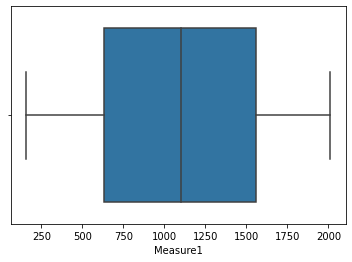

In [12]:
sns.boxplot(x=train['Measure1'])

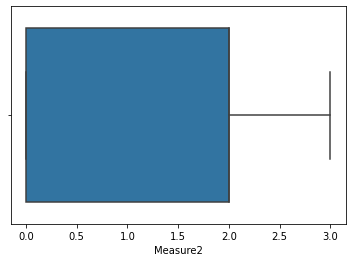

In [13]:
sns.boxplot(x=train['Measure2'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


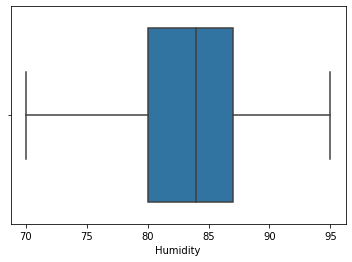

In [14]:

train['Humidity'][train['Humidity']< 70] = 70
train['Humidity'][train['Humidity']>95] = 95
sns.boxplot(x=train['Humidity'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


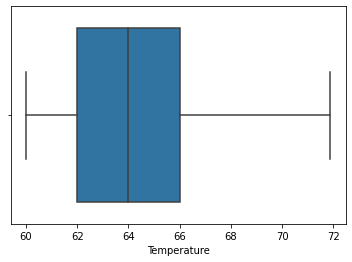

In [15]:
train['Temperature'][train['Temperature']<60] = 60
train['Temperature'][train['Temperature']>71.875] = 71.875
sns.boxplot(x = train['Temperature'])

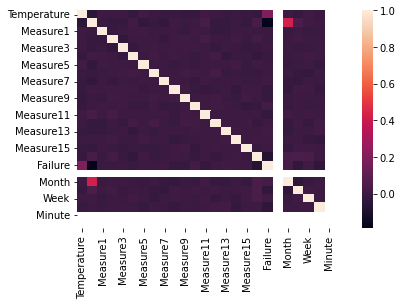

In [16]:
sns.heatmap(train.corr())

In [17]:
X = train[['Temperature', 'Humidity', 'Hours_since_prev', 'Year', 'Month', 'Day', 'Week']]
y = train['Failure']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=101)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
from sklearn.metrics import accuracy_score

In [20]:

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:

predicted_classes = model.predict(X_test)
predicted_classes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [22]:
predictions = pd.Series(predicted_classes)

In [23]:
parameters = model.coef_

In [24]:
print(parameters)

[[ 0.69549166 -0.37527331 -0.00465494 -0.01064639  0.28602946 -0.03670515
   0.04351306]]


In [25]:
from sklearn import metrics

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, predicted_classes))
print('MSE:', metrics.mean_squared_error(y_test, predicted_classes))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted_classes)))

MAE: 0.003975424647632815
MSE: 0.003975424647632815
RMSE: 0.06305096864944118


In [27]:
train.to_csv

<bound method NDFrame.to_csv of                   Date  Temperature  Humidity  ... Hour  Minute  Second
ID                                             ...                     
1     01-01-2016 00:00         67.0        82  ...    0       0       0
2     01-01-2016 01:00         68.0        77  ...    1       0       0
3     01-01-2016 02:00         64.0        76  ...    2       0       0
4     01-01-2016 03:00         63.0        80  ...    3       0       0
5     01-01-2016 04:00         65.0        81  ...    4       0       0
...                ...          ...       ...  ...  ...     ...     ...
7901  25-11-2016 04:00         60.0        81  ...    4       0       0
7902  25-11-2016 05:00         63.0        81  ...    5       0       0
7903  25-11-2016 06:00         60.0        83  ...    6       0       0
7904  25-11-2016 07:00         63.0        80  ...    7       0       0
7905  25-11-2016 08:00         67.0        77  ...    8       0       0

[7905 rows x 28 columns]>